In [44]:
import numpy as np
import pandas as pd


In [45]:
import pandas as pd

# Load the dataset with correct settings
books = pd.read_csv("Merged_Books.csv", low_memory=False)

# Strip any whitespace from column names
books.columns = books.columns.str.strip()

# Ensure Year-Of-Publication is treated as a string to avoid dtype warnings
books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(str)

# Display first few rows
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

In [46]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Unknown
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Unknown
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,Unknown
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Unknown
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,Unknown


In [47]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [48]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [49]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(274430, 9)
(1149780, 3)
(278858, 3)


In [50]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
Genre                  0
dtype: int64

In [51]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [52]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [53]:
users.duplicated().sum()

0

In [54]:
ratings.duplicated().sum()

0

In [55]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274430 entries, 0 to 274429
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 274430 non-null  object
 1   Book-Title           274430 non-null  object
 2   Book-Author          274428 non-null  object
 3   Year-Of-Publication  274430 non-null  object
 4   Publisher            274428 non-null  object
 5   Image-URL-S          274430 non-null  object
 6   Image-URL-M          274430 non-null  object
 7   Image-URL-L          274427 non-null  object
 8   Genre                274430 non-null  object
dtypes: object(9)
memory usage: 18.8+ MB


In [56]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
count,274430,274430,274428,274430,274428,274430,274430,274427,274430
unique,271360,242135,102022,118,16807,271044,271044,271041,2463
top,0385059418,The Secret Garden,William Shakespeare,2002,Harlequin,http://images.amazon.com/images/P/0385059418.0...,http://images.amazon.com/images/P/0385059418.0...,http://images.amazon.com/images/P/0140440143.0...,Unknown
freq,9,120,777,17793,7535,9,9,9,233196


## Popularity Based Recommender System


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [59]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
# num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [60]:
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [61]:
num_rating_df.dtypes

Book-Title     object
Book-Rating     int64
dtype: object

In [62]:
avg_rating_df=ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'}, inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [63]:
print(ratings_with_name.dtypes)

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
Genre                  object
dtype: object


In [64]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

In [65]:
ratings_with_name = ratings_with_name.dropna(subset=['Book-Rating'])

In [66]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Book-Rating,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [67]:
#keep only those books with no of ratings grater than 250
popular_df[popular_df['Book-Rating']>=250]

,Book-Title,Book-Rating,avg_ratings
75,'Salem's Lot,376,3.680851
764,1984,568,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
...,...,...,...
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584
238634,Wuthering Heights,390,2.938462


In [68]:
popular_df = popular_df[popular_df['Book-Rating']>=250].sort_values('avg_ratings',ascending=False).head(50)

In [69]:
popular_df

,Book-Title,Book-Rating,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
200913,The Other Boleyn Girl,318,4.761006


In [115]:
print(popular_df.columns)

Index(['Book-Title', 'Book-Author', 'Image-URL-M', 'Book-Rating',
       'avg_ratings'],
      dtype='object')


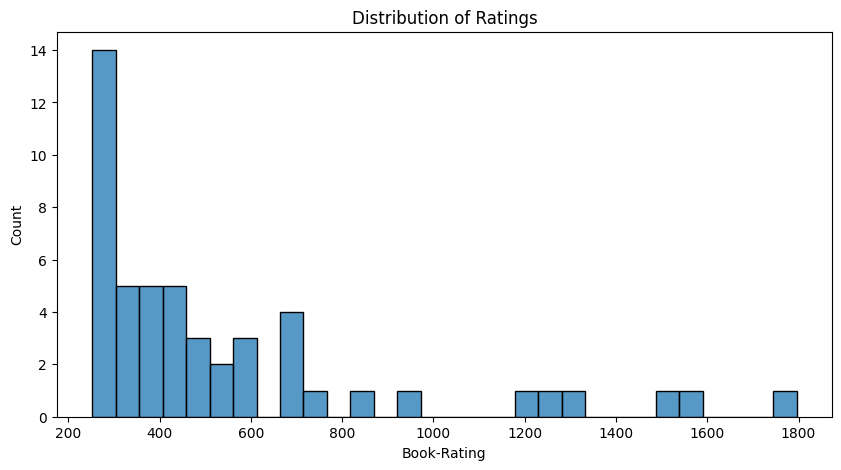

In [120]:
plt.figure(figsize=(10,5))
sns.histplot(popular_df['Book-Rating'], bins=30)
plt.title("Distribution of Ratings")
plt.show()

In [119]:
most_num_rating = popular_df["Book-Rating"].mode()[0]
print("Number of Book Rating:", most_num_rating)

Number of Book Rating: 252


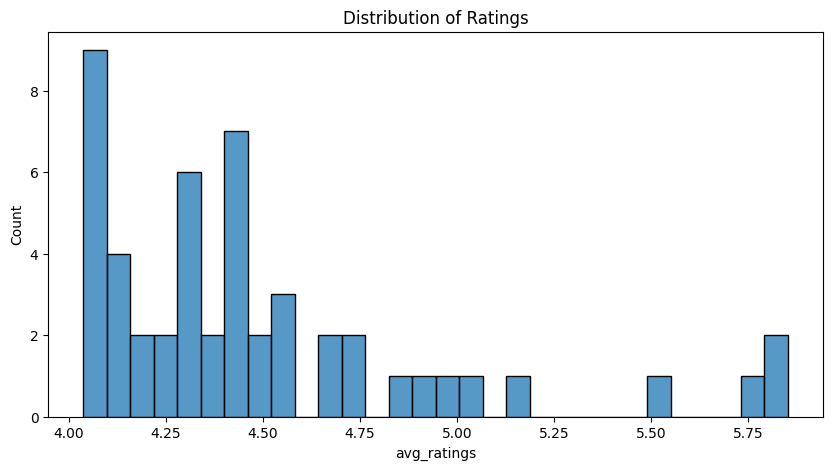

In [122]:
plt.figure(figsize=(10,5))
sns.histplot(popular_df["avg_ratings"], bins=30)
plt.title("Distribution of Ratings")
plt.title("Distribution of Ratings")
plt.show()

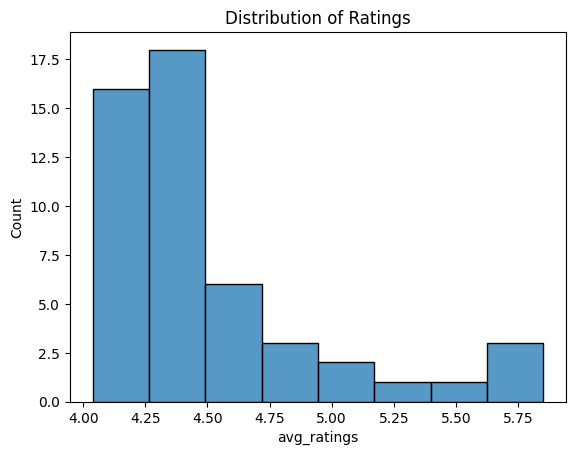

In [124]:
sns.histplot(popular_df["avg_ratings"])
plt.title("Distribution of Ratings")
plt.show()

In [118]:
most_common_rating = popular_df["avg_ratings"].mode()[0]
print("Most Common Rating:", most_common_rating)

Most Common Rating: 4.037383177570093


In [130]:
print(popular_df.columns)  

Index(['Book-Title', 'Book-Author', 'Image-URL-M', 'Book-Rating',
       'avg_ratings'],
      dtype='object')


In [139]:
#top books by books rating
top_books = popular_df.sort_values(by='Book-Rating', ascending=False).head(10)
print("The top books which are got the highest number of Book rating: \n")
print(top_books[["Book-Title", 'Book-Rating']])  # Adjust column names as needed

The top books which are got the highest number of Book rating: 

                              Book-Title  Book-Rating
82                     The Da Vinci Code         1796
199              The Secret Life of Bees         1548
58                 To Kill a Mockingbird         1530
162            The Lovely Bones: A Novel         1295
163                     The Great Gatsby         1230
379                       Fahrenheit 451         1227
481                    The Secret Garden          930
126   The Five People You Meet in Heaven          860
270  The Red Tent (Bestselling Backlist)          723
137                       Atlas Shrugged          690


In [142]:
author_counts = books["Book-Author"].value_counts().head(10)
print(author_counts)

Book-Author
William Shakespeare    777
Agatha Christie        639
Stephen King           603
Jane Austen            428
Ann M. Martin          423
Charles Dickens        409
Francine Pascal        375
Carolyn Keene          373
Isaac Asimov           330
Nora Roberts           315
Name: count, dtype: int64


C:\Users\komal\AppData\Local\Temp\ipykernel_23824\4194795892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette="coolwarm")


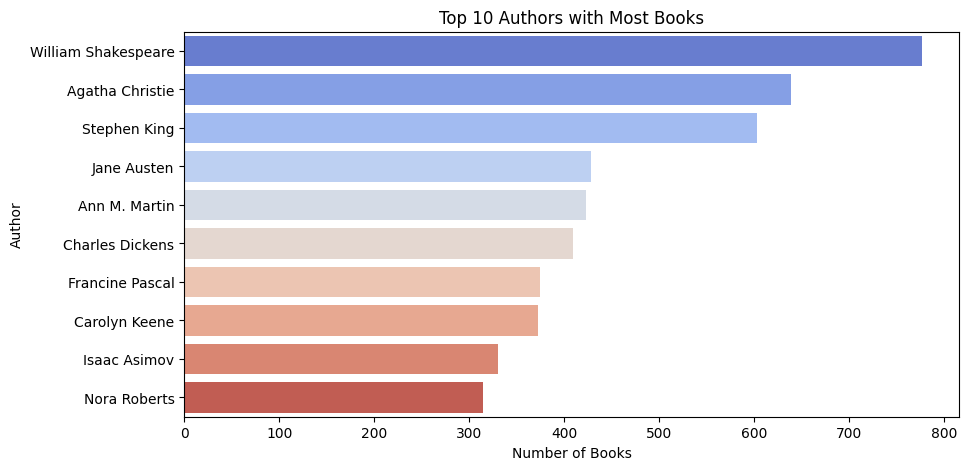

In [143]:
plt.figure(figsize=(10, 5))
sns.barplot(x=author_counts.values, y=author_counts.index, palette="coolwarm")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.title("Top 10 Authors with Most Books")
plt.show()

In [146]:
print(ratings.columns)

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [147]:
ratings_per_user = ratings.groupby('User-ID')['Book-Rating'].count()
avg_books_rated = ratings_per_user.mean()
print(f"📚 The average number of books rated per user: {avg_books_rated:.2f}")

📚 The average number of books rated per user: 10.92


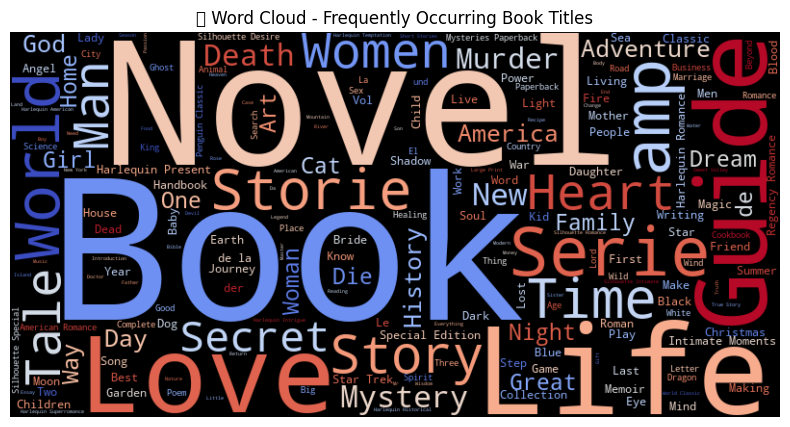

In [149]:
from wordcloud import WordCloud

# Word Cloud for Book Titles
title_text = " ".join(books["Book-Title"].dropna())  # Combine all titles into a single string
wordcloud_titles = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(title_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_titles, interpolation="bilinear")
plt.axis("off")
plt.title("📚 Word Cloud - Frequently Occurring Book Titles")
plt.show()

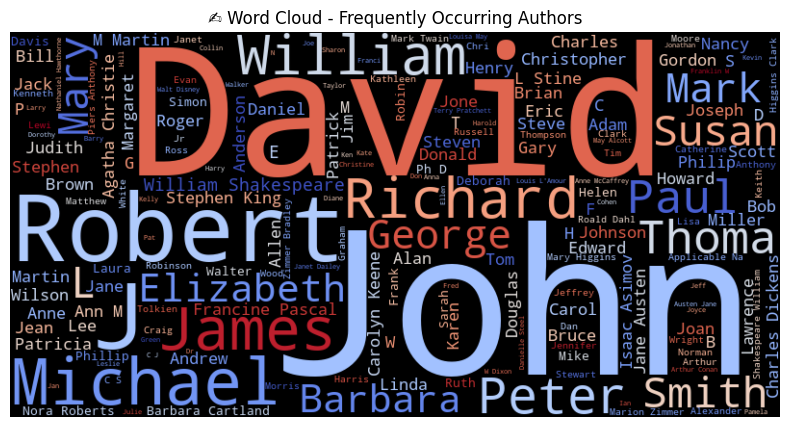

In [150]:
# Word Cloud for Authors
author_text = " ".join(books["Book-Author"].dropna())  # Combine all authors into a single string
wordcloud_authors = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(author_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_authors, interpolation="bilinear")
plt.axis("off")
plt.title("✍️ Word Cloud - Frequently Occurring Authors")
plt.show()

In [153]:
print(popular_df.dtypes)

Book-Title      object
Book-Author     object
Image-URL-M     object
Book-Rating      int64
avg_ratings    float64
dtype: object


C:\Users\komal\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


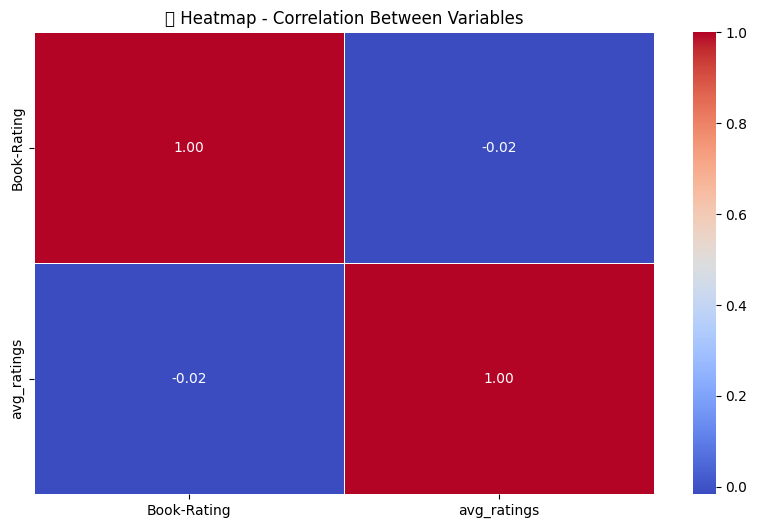

In [154]:
# Load dataset (Ensure popular_df contains numeric columns)
numeric_df = popular_df.select_dtypes(include=['number'])  # Select only numerical columns

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title
plt.title("🔍 Heatmap - Correlation Between Variables")
plt.show()

In [72]:
popular50=popular_df

In [73]:
popular50.head(50)

,Book-Title,Book-Rating,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
200913,The Other Boleyn Girl,318,4.761006


In [75]:
#top 50 books(popular one)
# popular_df[popular_df['Book-Rating']>=250].sort_values(by='avg_rating', ascending=False).head(50)

In [76]:
popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,Book-Rating,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,Fantasy
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,Fantasy
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,Fantasy
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,Fantasy
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,Fantasy
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,Unknown
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,Unknown
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,Fantasy
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,Unknown
39,The Other Boleyn Girl,318,4.761006,0743227441,Philippa Gregory,2002,Touchstone,http://images.amazon.com/images/P/0743227441.0...,http://images.amazon.com/images/P/0743227441.0...,http://images.amazon.com/images/P/0743227441.0...,"Historical,Historical Fiction;Fiction;Historic..."


In [77]:
popular_df.shape

(50, 3)

In [78]:
popular_df=popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'Book-Rating', 'avg_ratings']]

In [79]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [80]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Book-Rating,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,The Other Boleyn Girl,Philippa Gregory,http://images.amazon.com/images/P/0743227441.0...,318,4.761006


## Collaborative Filtering Based Recommender System 

In [81]:
 ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Unknown
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,Unknown
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,Unknown
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Unknown
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
1065359,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,Unknown
1065360,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,Self-Help
1065361,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,Unknown
1065362,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,Unknown


In [82]:
ratings_with_name.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [83]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [84]:
users_which_rated=x[x].index    #user id's which rated on min 200 books

In [85]:
users_which_rated

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       273979, 274004, 274061, 274301, 274308, 274808, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=847)

In [86]:
ratings_with_name[ratings_with_name['User-ID'].isin(users_which_rated)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
1189,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,Unknown
1190,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,Unknown
1191,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,Unknown
1192,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,Unknown
1193,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
1063550,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,Adventure
1063551,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,Unknown
1063552,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,Unknown
1063553,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,Unknown


In [87]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [88]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [89]:
famous_books

Index([''Salem's Lot', '1984', '1st to Die: A Novel', '2nd Chance',
       '4 Blondes', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=803)

In [90]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [91]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
1189,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,Unknown
1202,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,Unknown
1204,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,Unknown
1207,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,Unknown
1213,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,Classics;Fiction;Childrens;Young Adult;Histori...
...,...,...,...,...,...,...,...,...,...,...,...
1063389,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,Mystery
1063461,275970,1573227951,0,An Instance of the Fingerpost,Iain Pears,2000,Riverhead Books,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,"Historical,Historical Fiction;Fiction;Mystery;..."
1063463,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,Unknown
1063502,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,Unknown


In [92]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
1189,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,Unknown
1202,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,Unknown
1204,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,Unknown
1207,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,Unknown
1213,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,Classics;Fiction;Childrens;Young Adult;Histori...
...,...,...,...,...,...,...,...,...,...,...,...
1063461,275970,1573227951,0,An Instance of the Fingerpost,Iain Pears,2000,Riverhead Books,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,"Historical,Historical Fiction;Fiction;Mystery;..."
1063462,275970,1573227951,0,An Instance of the Fingerpost,Iain Pears,2000,Riverhead Books,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,http://images.amazon.com/images/P/1573227951.0...,"Historical,Historical Fiction;Fiction;Mystery;..."
1063463,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,Unknown
1063502,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,Unknown


In [93]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [94]:
pt.fillna(0,inplace=True)

In [95]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,273979,274004,274061,274301,274308,274808,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
similarity_scores = cosine_similarity(pt)

In [98]:
similarity_scores.shape

(803, 803)

In [99]:
similarity_scores

array([[1.        , 0.        , 0.06269097, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.09617958, ..., 0.11563689, 0.07015888,
        0.04121214],
       [0.06269097, 0.09617958, 1.        , ..., 0.07313708, 0.16475569,
        0.14009737],
       ...,
       [0.        , 0.11563689, 0.07313708, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.        , 0.07015888, 0.16475569, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.        , 0.04121214, 0.14009737, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [100]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:9]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        # item.extend(list(temp_df.drop_duplicates('Book-Title')['avg_rating'].values))
        # item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [101]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg']]

In [102]:
recommend('The Five People You Meet in Heaven')

[["Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
  'MITCH ALBOM',
  'http://images.amazon.com/images/P/0385484518.01.MZZZZZZZ.jpg'],
 ['In Her Shoes : A Novel',
  'Jennifer Weiner',
  'http://images.amazon.com/images/P/0743418190.01.MZZZZZZZ.jpg'],
 ['The Last Time They Met : A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316781266.01.MZZZZZZZ.jpg'],
 ['The Woman Next Door',
  'Barbara Delinsky',
  'http://images.amazon.com/images/P/0743411250.01.MZZZZZZZ.jpg'],
 ['Good in Bed',
  'Jennifer Weiner',
  'http://images.amazon.com/images/P/0743418174.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg'],
 ['Girl in Hyacinth Blue',
  'Susan Vreeland',
  'http://images.amazon.com/images/P/1565115430.01.MZZZZZZZ.jpg'],
 ['Fall On Your Knees (Oprah #45)',
  'Ann-Marie MacDonald',
  'http://images.amazon.com/images/P/0743237188.01.MZZZZZZZ.jpg']]

In [103]:
recommend('Message in a Bottle')

[['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Mulberry Tree',
  'Jude Deveraux',
  'http://images.amazon.com/images/P/0743437640.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['Sanctuary',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515122734.01.MZZZZZZZ.jpg'],
 ['Nightmares &amp; Dreamscapes',
  'Stephen King',
  'http://images.amazon.com/images/P/0451180232.01.MZZZZZZZ.jpg'],
 ['All I Really Need to Know',
  'ROBERT FULGHUM',
  'http://images.amazon.com/images/P/080410526X.01.MZZZZZZZ.jpg'],
 ['Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)',
  'Janet Evanovich',
  'http://images.amazon.com/images/P/0312983867.01.MZZZZZZZ.jpg']]

In [104]:
recommend('The Notebook')

[['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['The Five People You Meet in Heaven',
  'Mitch Albom',
  'http://images.amazon.com/images/P/0786868716.01.MZZZZZZZ.jpg'],
 ['One Door Away from Heaven',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582755.01.MZZZZZZZ.jpg'],
 ['The Guardian',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446527793.01.MZZZZZZZ.jpg'],
 ["Suzanne's Diary for Nicholas",
  'James Patterson',
  'http://images.amazon.com/images/P/0316969443.01.MZZZZZZZ.jpg']]

In [105]:
recommend('Animal Farm')

[['Hamlet',
  'William Shakespeare',
  'http://images.amazon.com/images/P/067172262X.01.MZZZZZZZ.jpg'],
 ['Macbeth',
  'William Shakespeare',
  'http://images.amazon.com/images/P/0451521358.01.MZZZZZZZ.jpg'],
 ['Black Beauty',
  'Anna Sewell',
  'http://images.amazon.com/images/P/0440403553.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison',
  'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg'],
 ['Anna Karenina',
  'Leo Tolstoy',
  'http://images.amazon.com/images/P/0553211714.01.MZZZZZZZ.jpg']]

In [106]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [107]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Book-Rating,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [108]:
np.where(pt.index=='1984')[0][0]

1

In [109]:
np.where(pt.index=='Zoya')[0][0]

801

In [110]:
sorted(list(enumerate(similarity_scores[1])), key= lambda x: x[1], reverse=True)[1:9]

[(60, 0.25532443198306526),
 (618, 0.24788448306844413),
 (389, 0.2455975090844989),
 (723, 0.2204082264659668),
 (101, 0.21836496204087918),
 (626, 0.21605012547187455),
 (209, 0.2100087107164359),
 (568, 0.20838315180930564)]

In [111]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [112]:
books['Image-URL-M'][0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [113]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))